In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
result_paths = [
    ("results_debug.csv", "debug"),
    ("results_release.csv", "release"),
    ("results_release_opt.csv", "release_opt")]

results_df = pd.DataFrame()
for (path, opt) in result_paths:
    results_df_opt = pd.read_csv(path)
    results_df_opt["opt"] = opt
    results_df = pd.concat([results_df, results_df_opt])

results_df

,Method,n,k,elapsed,opt
0,BruteForce,1024,8,305097,debug
1,BruteForceIdiomatic,1024,8,307795,debug
2,Heap,1024,8,430732,debug
3,BST,1024,8,311975,debug
4,Linear,1024,8,123166,debug
...,...,...,...,...,...
315,BruteForce,131072,1024,139214461,release_opt
316,BruteForceIdiomatic,131072,1024,146483857,release_opt
317,Heap,131072,1024,2683680,release_opt
318,BST,131072,1024,18784173,release_opt


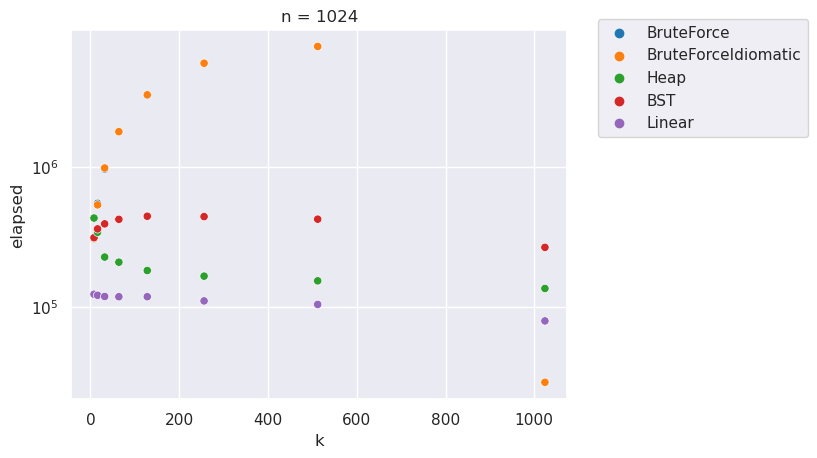

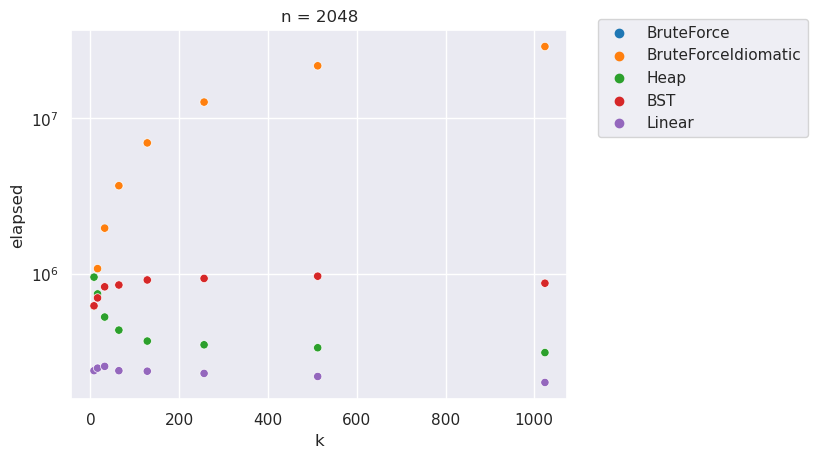

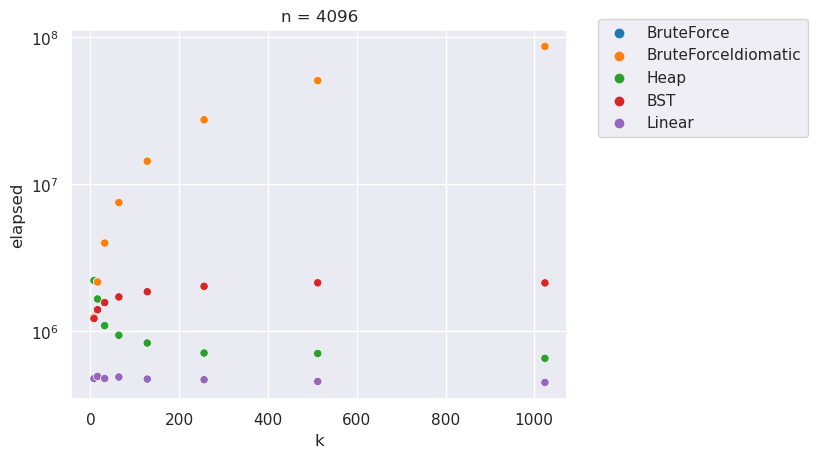

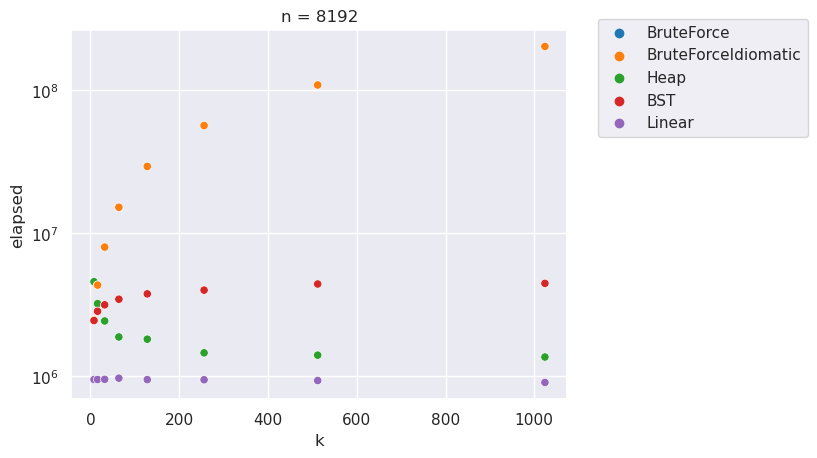

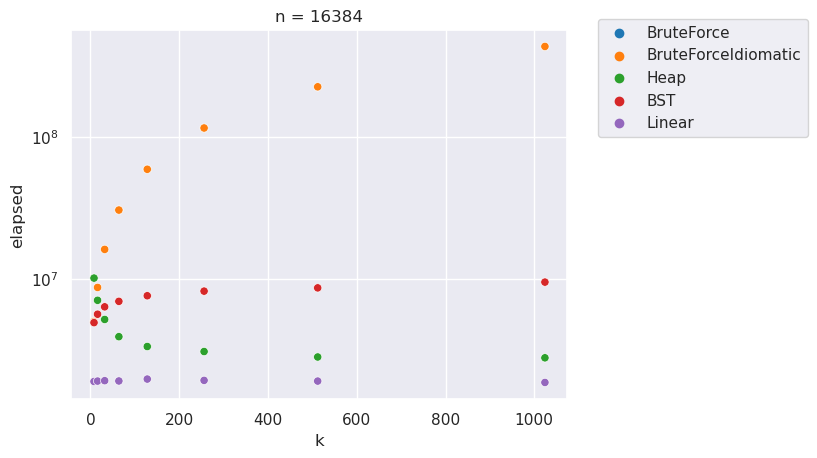

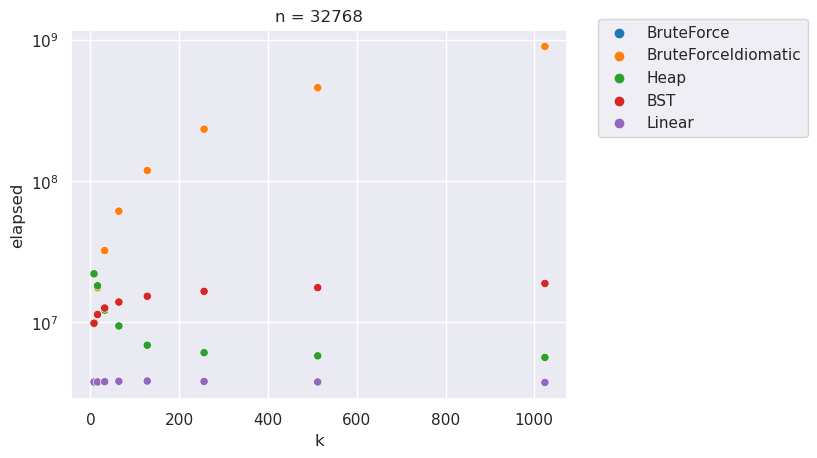

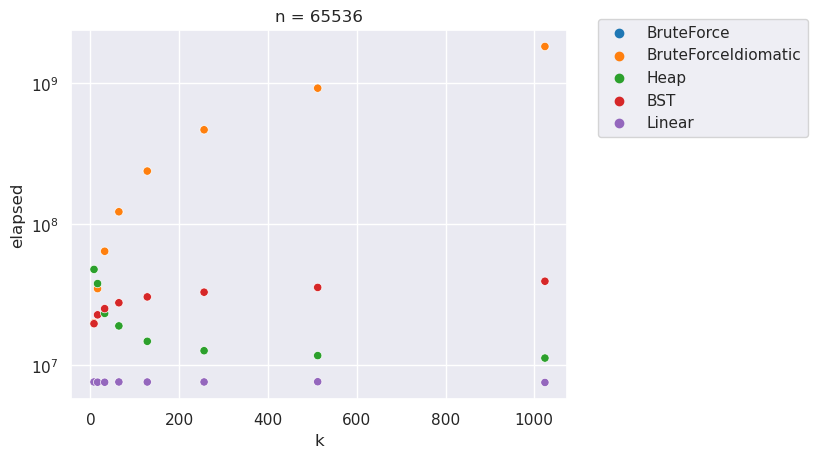

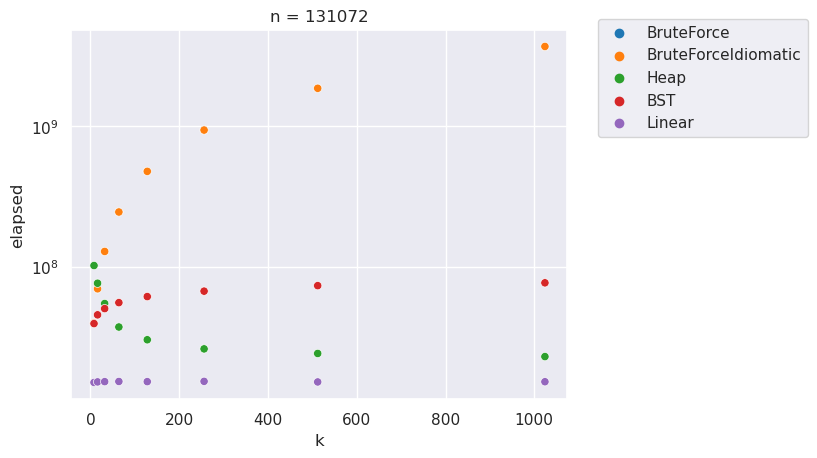

In [3]:
sns.set_style("darkgrid")
sns.set_context("notebook")
for curr_n in pd.unique(results_df["n"]):
    plt.title(f"n = {curr_n}")
    curr_df = results_df[(results_df["n"] == curr_n) & (results_df["opt"] == "debug")]
    ax = sns.scatterplot(x="k", y="elapsed", hue="Method", data=curr_df)
    plt.yscale("log")
    ax.legend(bbox_to_anchor=(1.5, 1.05))
    plt.show()

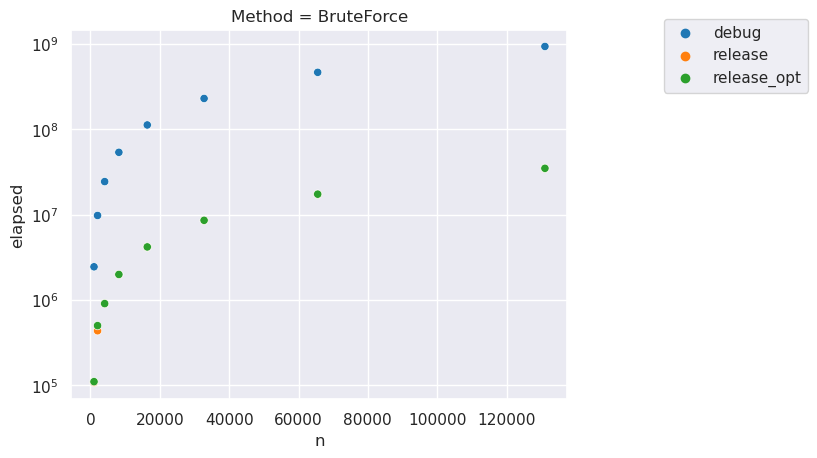

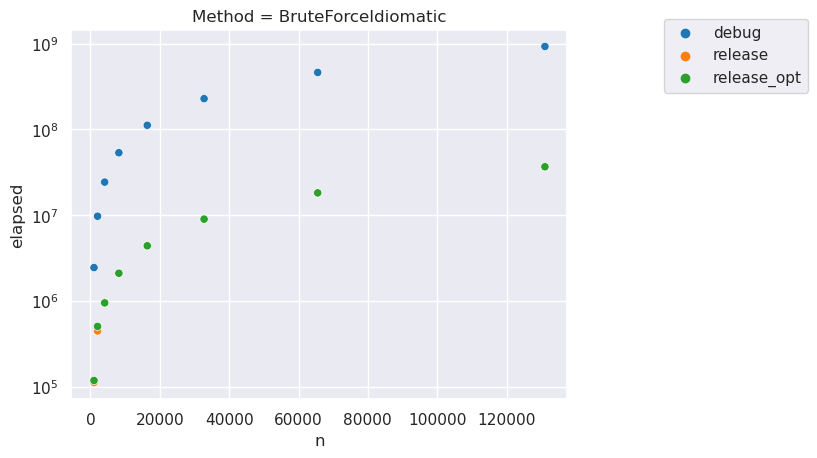

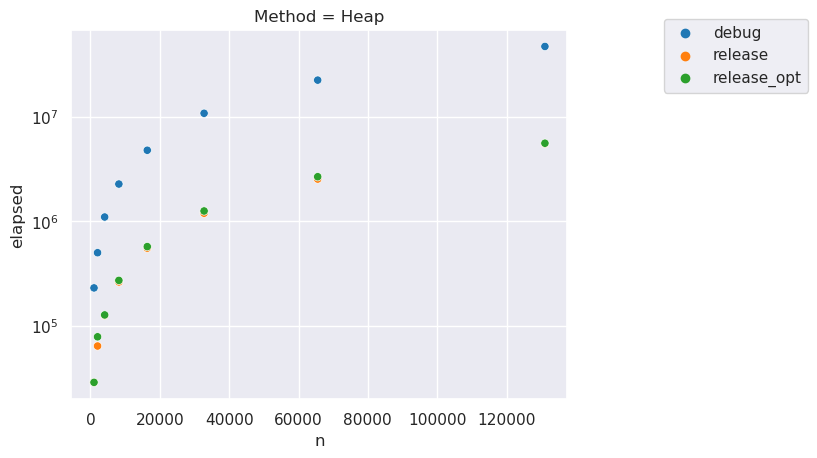

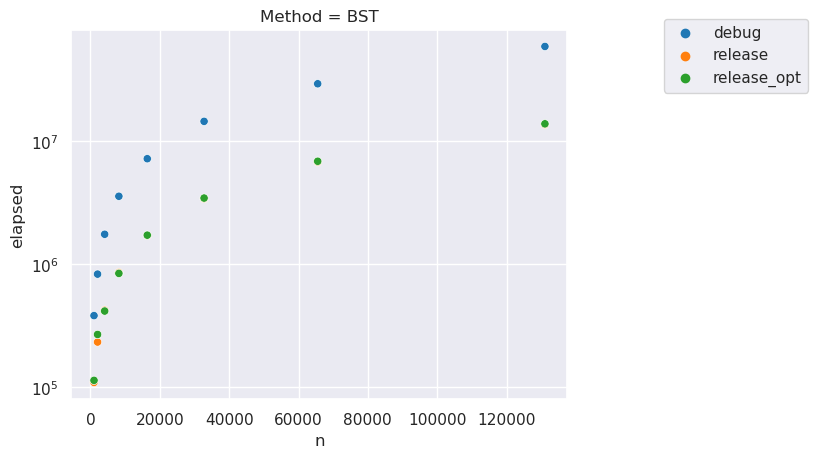

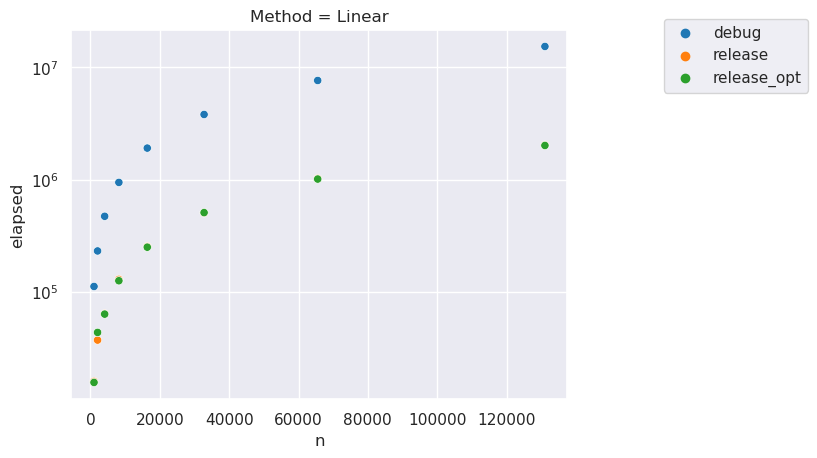

In [4]:
sns.set_style("darkgrid")
sns.set_context("notebook")
for curr_mth in pd.unique(results_df["Method"]):
    plt.title(f"Method = {curr_mth}")
    curr_df = results_df[results_df["Method"] == curr_mth].drop(["Method", "k"], axis=1).groupby(["opt", "n"]).mean().reset_index()
    ax = sns.scatterplot(x="n", y="elapsed", hue="opt", data=curr_df)
    plt.yscale("log")
    ax.legend(bbox_to_anchor=(1.5, 1.05))
    plt.show()